# Customer Spending Score Prediction using Min-Max Scaling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
64,65,Male,63,48,51
7,8,Female,23,18,94
122,123,Female,40,69,58
140,141,Female,57,75,5
147,148,Female,32,77,74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df = df.drop(columns=['CustomerID'])

In [6]:
df.sample(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,Male,32,137,18
172,Male,36,87,10
2,Female,20,16,6
184,Female,41,99,39
23,Male,31,25,73


In [7]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
df.shape

(200, 4)

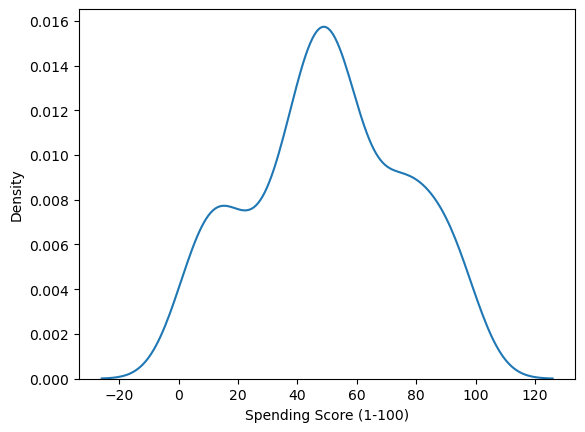

In [9]:
sns.kdeplot(df['Spending Score (1-100)'])
plt.show()

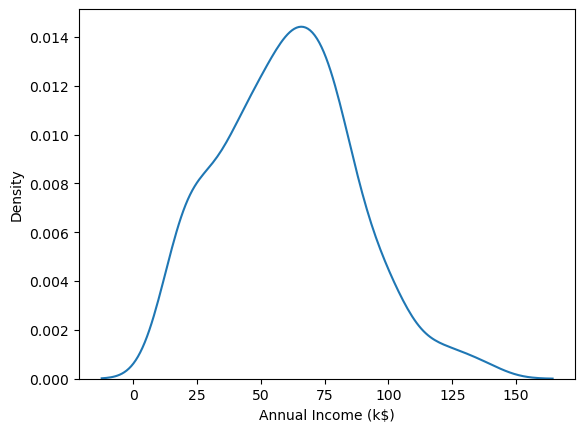

In [10]:
sns.kdeplot(df['Annual Income (k$)'])
plt.show()

### Encoding Categorial Data 

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
le

LabelEncoder()

In [12]:
df['Gender'] = le.fit_transform(df['Gender'])

In [13]:
df.sample(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
167,0,33,86,95
146,1,48,77,36
65,1,18,48,59
75,1,26,54,54
173,1,36,87,92


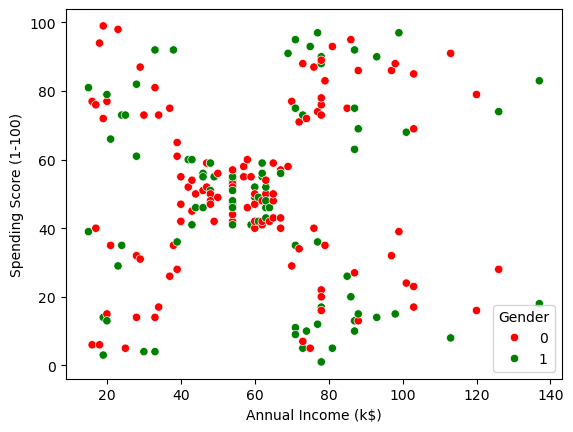

In [14]:
color_dict = {0: 'red', 1:'green'}

sns.scatterplot(x = df['Annual Income (k$)'], 
               y = df['Spending Score (1-100)'],
               hue = df['Gender'],
               palette = color_dict)
plt.show()

# Train and Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Gender', axis = 1),
                                                    df['Gender'], test_size = 0.3, random_state=0)


In [17]:
x_train.shape, x_test.shape

((140, 3), (60, 3))

# Train Scaler - Min Max Scaler

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [20]:
scaler.fit(x_train)

MinMaxScaler()

In [21]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_train_scaled 

,Age,Annual Income (k$),Spending Score (1-100)
0,0.403846,0.459016,0.755102
1,0.557692,0.368852,0.469388
2,0.269231,0.672131,0.867347
3,0.326923,0.065574,0.989796
4,0.384615,0.516393,0.765306
...,...,...,...
135,0.961538,0.270492,0.479592
136,0.288462,0.803279,0.071429
137,0.596154,0.409836,0.591837
138,0.173077,0.204918,0.469388


In [24]:
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_train.columns)
x_test_scaled

,Age,Annual Income (k$),Spending Score (1-100)
0,0.653846,0.065574,0.285714
1,0.423077,0.590164,0.122449
2,0.692308,0.393443,0.459184
3,0.576923,0.377049,0.418367
4,0.173077,0.598361,0.693878
5,0.538462,0.680328,0.142857
6,0.076923,0.016393,0.765306
7,0.576923,0.508197,0.357143
8,0.769231,0.040984,0.142857
9,0.500000,0.516393,0.193878


In [23]:
np.round(x_train.describe(),1)

,Age,Annual Income (k$),Spending Score (1-100)
count,140.0,140.0,140.0
mean,38.1,61.2,51.1
std,14.1,26.9,25.3
min,18.0,15.0,1.0
25%,28.0,42.0,38.2
50%,35.0,60.5,52.0
75%,49.0,78.0,73.0
max,70.0,137.0,99.0


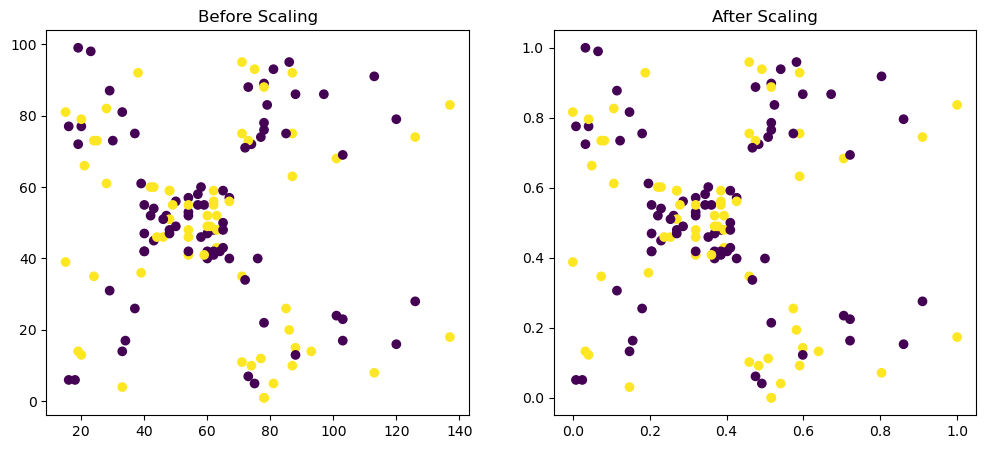

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train['Annual Income (k$)'], x_train['Spending Score (1-100)'],c=y_train)
ax1.set_title('Before Scaling')

ax2.scatter(x_train_scaled['Annual Income (k$)'], x_train_scaled['Spending Score (1-100)'],c=y_train)
ax2.set_title('After Scaling')

plt.show()

In [38]:
df.to_csv('scaled_MallCustomers_.csv', index=False)

NameError: name 'df_scaled' is not defined